In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [6]:
x = df['Temperature'].values.reshape(-1, 1)
y = df['Revenue'].values

In [7]:
x.shape

(500, 1)

In [8]:
df['Temperature'].values.shape

(500,)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [39]:
model = RandomForestRegressor(n_estimators=100,bootstrap=True)
model.fit(x_train,y_train)

RandomForestRegressor()

In [40]:
y_pred = model.predict(x_test)

In [41]:
model.score(x_train,y_train)

0.9959347795817244

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9686064599303315

In [43]:
import matplotlib.pyplot as plt

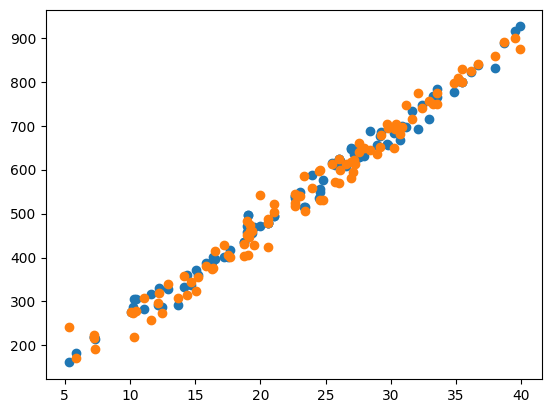

In [44]:
plt.scatter(x_test,y_pred)
plt.scatter(x_test,y_test)
plt.show()

In [45]:
import seaborn as sns
final = pd.DataFrame({'Actual' : y_test,'Predicted' : y_pred})
final.head()

,Actual,Predicted
0,430.343903,435.305303
1,809.672053,800.969694
2,429.435702,468.631114
3,702.994011,658.049603
4,219.303993,304.845245


In [46]:
final.corr()

,Actual,Predicted
Actual,1.000000,0.984469
Predicted,0.984469,1.000000


<AxesSubplot: >

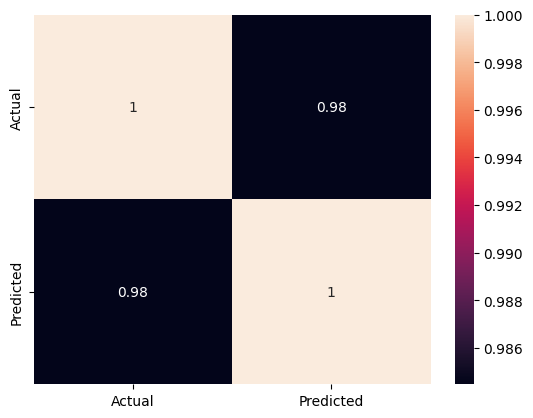

In [47]:
sns.heatmap(final.corr(),annot = True)

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [52]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [53]:
df.insert(5,'fuel_encoder',label.fit_transform(df['fuel']))

In [54]:
df.head()

,name,year,selling_price,km_driven,fuel,fuel_encoder,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,4,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,4,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,4,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,Manual,Second Owner


In [56]:
df.insert(7,'seller_type_label',label.fit_transform(df['seller_type']))
# df.insert(8,'transmission_label',label.fit_transform(df['transmission']))
# df.insert(-1,'owner_label',label.fit_transform(df['owner']))

ValueError: cannot insert seller_type_label, already exists

In [57]:
df.head()

,name,year,selling_price,km_driven,fuel,fuel_encoder,seller_type,seller_type_label,transmission_label,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,4,Individual,1,1,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,4,Individual,1,1,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,1,1,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,4,Individual,1,1,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,1,1,Manual,Second Owner


In [58]:
df.insert(11,'owner_label',label.fit_transform(df['owner']))

In [59]:
df.head()

,name,year,selling_price,km_driven,fuel,fuel_encoder,seller_type,seller_type_label,transmission_label,transmission,owner,owner_label
0,Maruti 800 AC,2007,60000,70000,Petrol,4,Individual,1,1,Manual,First Owner,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,4,Individual,1,1,Manual,First Owner,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,1,1,Manual,First Owner,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,4,Individual,1,1,Manual,First Owner,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,1,1,Manual,Second Owner,2


In [60]:
df.name.value_counts()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

In [65]:
df.fuel_encoder.nunique()

5

In [66]:
df.fuel.nunique()

5

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                4340 non-null   object
 1   year                4340 non-null   int64 
 2   selling_price       4340 non-null   int64 
 3   km_driven           4340 non-null   int64 
 4   fuel                4340 non-null   object
 5   fuel_encoder        4340 non-null   int32 
 6   seller_type         4340 non-null   object
 7   seller_type_label   4340 non-null   int32 
 8   transmission_label  4340 non-null   int32 
 9   transmission        4340 non-null   object
 10  owner               4340 non-null   object
 11  owner_label         4340 non-null   int32 
dtypes: int32(4), int64(3), object(5)
memory usage: 339.2+ KB


In [71]:
req = df.copy(['year','km_driven','fuel_encoder','seller_type_label','transmission_label','owner_label'])
req.head()

,name,year,selling_price,km_driven,fuel,fuel_encoder,seller_type,seller_type_label,transmission_label,transmission,owner,owner_label
0,Maruti 800 AC,2007,60000,70000,Petrol,4,Individual,1,1,Manual,First Owner,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,4,Individual,1,1,Manual,First Owner,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,1,Individual,1,1,Manual,First Owner,0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,4,Individual,1,1,Manual,First Owner,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,1,Individual,1,1,Manual,Second Owner,2


In [72]:
req = df.drop(['name','selling_price','fuel','seller_type','transmission','owner'],axis = 1)
req.head()

,year,km_driven,fuel_encoder,seller_type_label,transmission_label,owner_label
0,2007,70000,4,1,1,0
1,2007,50000,4,1,1,0
2,2012,100000,1,1,1,0
3,2017,46000,4,1,1,0
4,2014,141000,1,1,1,2


In [73]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [74]:
req.describe()

,year,km_driven,fuel_encoder,seller_type_label,transmission_label,owner_label
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,2013.090783,66215.777419,2.469124,0.794470,0.896774,0.820276
std,4.215344,46644.102194,1.508435,0.458629,0.304289,1.233494
min,1992.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,35000.000000,1.000000,1.000000,1.000000,0.000000
50%,2014.000000,60000.000000,1.000000,1.000000,1.000000,0.000000
75%,2016.000000,90000.000000,4.000000,1.000000,1.000000,2.000000
max,2020.000000,806599.000000,4.000000,2.000000,1.000000,4.000000


In [78]:
len(df.name.unique())

1491

In [85]:
df['fuel_encoder'].sum()

10716

In [86]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [87]:
req.head()

,year,km_driven,fuel_encoder,seller_type_label,transmission_label,owner_label
0,2007,70000,4,1,1,0
1,2007,50000,4,1,1,0
2,2012,100000,1,1,1,0
3,2017,46000,4,1,1,0
4,2014,141000,1,1,1,2


In [88]:
req.drop('year',axis = 1,inplace = True)

In [89]:
req.head()

,km_driven,fuel_encoder,seller_type_label,transmission_label,owner_label
0,70000,4,1,1,0
1,50000,4,1,1,0
2,100000,1,1,1,0
3,46000,4,1,1,0
4,141000,1,1,1,2


In [91]:
df['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [93]:
model = RandomForestRegressor()

In [94]:
x = req.values
x

array([[ 70000,      4,      1,      1,      0],
       [ 50000,      4,      1,      1,      0],
       [100000,      1,      1,      1,      0],
       ...,
       [ 83000,      4,      1,      1,      2],
       [ 90000,      1,      1,      1,      0],
       [ 40000,      4,      1,      1,      0]], dtype=int64)

In [95]:
y = df['selling_price'].values
y

array([ 60000, 135000, 600000, ..., 110000, 865000, 225000], dtype=int64)

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [105]:
x_train.shape

(3472, 5)

In [106]:
y_train.shape

(3472,)

In [107]:
x_test.shape

(868, 5)

In [108]:
y_test.shape

(868,)

In [109]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [110]:
from sklearn.ensemble import ExtraTreesRegressor
tree = ExtraTreesRegressor()
tree.fit(x_train,y_train)

ExtraTreesRegressor()

In [113]:
graph = tree.feature_importances_
graph

array([0.42503989, 0.15421799, 0.04358392, 0.31777686, 0.05938133])

In [114]:
req.head(0)

,km_driven,fuel_encoder,seller_type_label,transmission_label,owner_label


<BarContainer object of 5 artists>

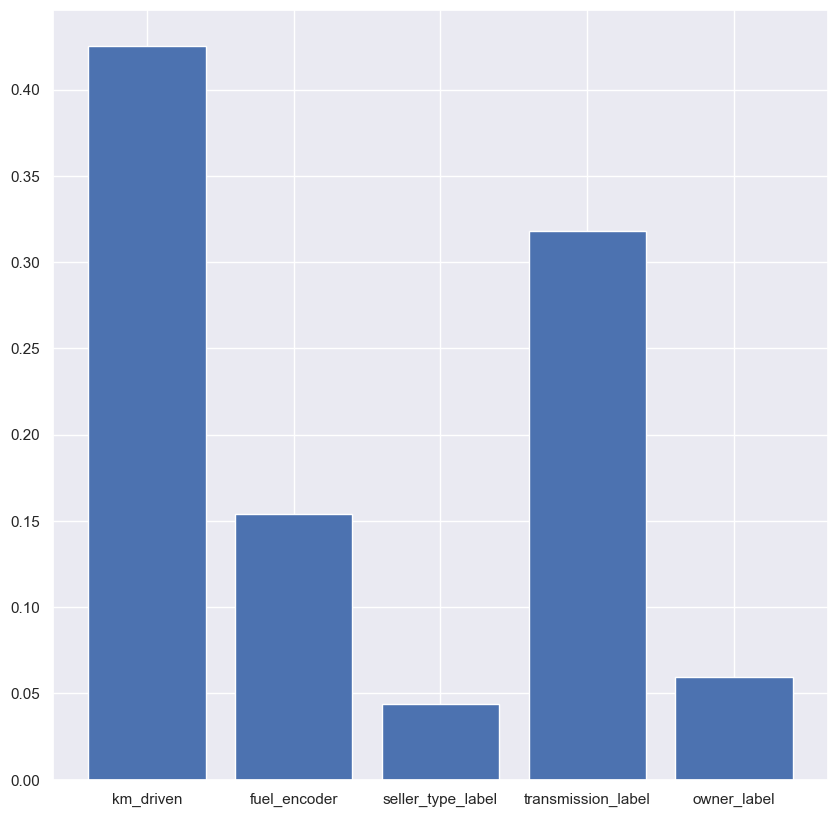

In [126]:
plt.figure(figsize=(10,10))
plt.bar(req.columns,graph)

In [135]:
reg = RandomForestRegressor(n_estimators=10)
reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [136]:
reg.score(x_train,y_train)

0.8151761074385683

In [137]:
y_pred = reg.predict(x_test)

In [138]:
r2_score(y_test,y_pred)

0.5449405168066731

In [140]:
reg = RandomForestRegressor()
reg

RandomForestRegressor()

In [141]:
import numpy as np

In [144]:
n_estimators = [int(i) for i in np.linspace(100,1000,10)]
max_depth = [int(i) for i in np.linspace(10,100,10)]
min_samples_split = [2,4,6,8,10]
max_features = ['sqrt' ,'log2']
max_leaf_nodes = [10,20,5,15,25]

In [146]:
parameters = {'n_estimators' : n_estimators,
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split,
             'max_features' : max_features,
             'max_leaf_nodes' : max_leaf_nodes}
parameters

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 4, 6, 8, 10],
 'max_features': ['sqrt', 'log2'],
 'max_leaf_nodes': [10, 20, 5, 15, 25]}

In [147]:
from sklearn.model_selection import RandomizedSearchCV

In [148]:
search = RandomizedSearchCV(estimator=reg,param_distributions=parameters,n_jobs=1,random_state=10,verbose=12,cv=5)

In [149]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_split=8, n_estimators=1000
[CV 1/5; 1/10] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_split=8, n_estimators=1000;, score=0.561 total time=   9.9s
[CV 2/5; 1/10] START max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_split=8, n_estimators=1000
[CV 2/5; 1/10] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_split=8, n_estimators=1000;, score=0.616 total time=  14.1s
[CV 3/5; 1/10] START max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_split=8, n_estimators=1000
[CV 3/5; 1/10] END max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_split=8, n_estimators=1000;, score=0.366 total time=   4.2s
[CV 4/5; 1/10] START max_depth=30, max_features=log2, max_leaf_nodes=10, min_samples_split=8, n_estimators=1000
[CV 4/5; 1/10] END max_depth=30, max_features=log2, max_leaf_n

[CV 3/5; 7/10] END max_depth=100, max_features=log2, max_leaf_nodes=20, min_samples_split=6, n_estimators=1000;, score=0.338 total time=   3.5s
[CV 4/5; 7/10] START max_depth=100, max_features=log2, max_leaf_nodes=20, min_samples_split=6, n_estimators=1000
[CV 4/5; 7/10] END max_depth=100, max_features=log2, max_leaf_nodes=20, min_samples_split=6, n_estimators=1000;, score=0.673 total time=   3.5s
[CV 5/5; 7/10] START max_depth=100, max_features=log2, max_leaf_nodes=20, min_samples_split=6, n_estimators=1000
[CV 5/5; 7/10] END max_depth=100, max_features=log2, max_leaf_nodes=20, min_samples_split=6, n_estimators=1000;, score=0.609 total time=   3.5s
[CV 1/5; 8/10] START max_depth=40, max_features=sqrt, max_leaf_nodes=10, min_samples_split=6, n_estimators=100
[CV 1/5; 8/10] END max_depth=40, max_features=sqrt, max_leaf_nodes=10, min_samples_split=6, n_estimators=100;, score=0.568 total time=   0.2s
[CV 2/5; 8/10] START max_depth=40, max_features=sqrt, max_leaf_nodes=10, min_samples_spli

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [10, 20, 5, 15, 25],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=10, verbose=12)

In [150]:
search.best_estimator_

RandomForestRegressor(max_depth=30, max_features='log2', max_leaf_nodes=20,
                      min_samples_split=10, n_estimators=500)

In [152]:
y_pred = search.predict(x_test)

In [154]:
r2_score(y_pred,y_test)

-0.2004252227563006

In [155]:
search.score(x_train,y_train)

0.655399414796479

In [156]:
model.score(x_train,y_train)

0.8270412860412468

In [157]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [158]:
model.score(x_train,y_train)

0.8245733004157193

In [159]:
ypred = model.predict(x_test)
r2_score(y_test,ypred)

0.536972686472738